In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_extraction import DictVectorizer

df = pd.read_csv('wine_fullclean.csv') 

In [14]:
features = ['points', 'country', 'province','variety', 'region_1', 'winery']

df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=42)

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

del df_train['price']
del df_val['price']
del df_test['price']
len(df_full_train), len(df_train), len(df_val), len(df_test)

(86412, 64809, 21603, 21604)

In [15]:
dv = DictVectorizer(sparse= True)

train_dicts = df_train[features].to_dict(orient= 'records')
X_train = dv.fit_transform(train_dicts)
val_dicts = df_val[features].to_dict(orient= 'records')
X_val = dv.transform(val_dicts)

/home/marcus-vinicius/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcus-vinicius/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

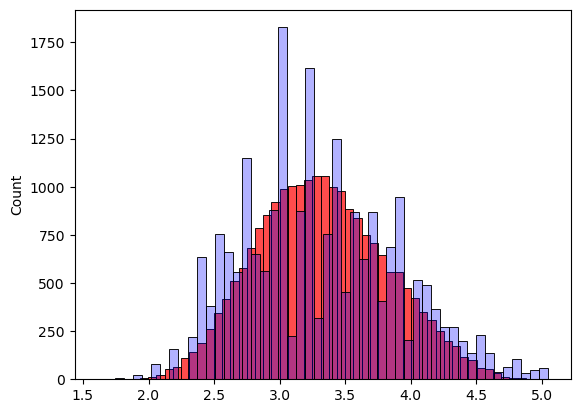

In [16]:
ridge_model = Ridge(alpha= 1.0)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_val)

sns.histplot(y_pred, color= 'red', alpha= 0.7, bins= 50)
sns.histplot(y_val, color= 'blue', alpha= 0.3, bins= 50)

In [17]:
y_pred_orig = np.expm1(y_pred) 
# Obter o valor real (target):
y_val_orig= np.expm1(y_val)

# Cálculo do MAE
mae = mean_absolute_error(y_val_orig, y_pred_orig)
print(f"MAE (Erro Absoluto Médio): ${mae:.2f}")

# Cálculo do RMSE
rmse = np.sqrt(mean_squared_error(y_val_orig, y_pred_orig))
print(f"RMSE (Raiz do Erro Quadrático Médio): ${rmse:.2f}")

MAE (Erro Absoluto Médio): $8.26
RMSE (Raiz do Erro Quadrático Médio): $13.60


Fazendo um modelo final mais robusto com df_train + df_val

/home/marcus-vinicius/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcus-vinicius/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

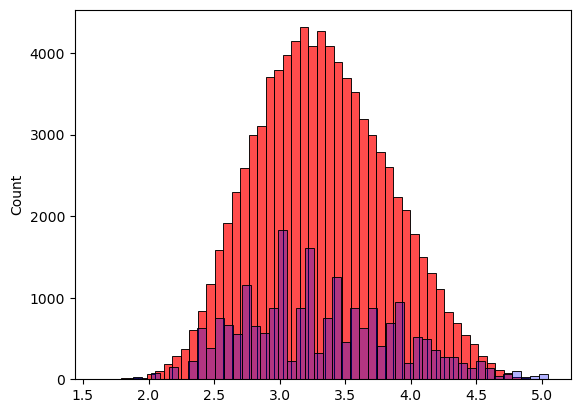

In [25]:
y_full_train = np.log1p(df_full_train.price.values)
full_train_dicts = df_full_train[features].to_dict(orient= 'records')
X_full_train = dv.transform(full_train_dicts)

ridge_model = Ridge(alpha= 1.0)
ridge_model.fit(X_full_train, y_full_train)
y_pred = ridge_model.predict(X_full_train)

sns.histplot(y_pred, color= 'red', alpha= 0.7, bins= 50)
sns.histplot(y_val, color= 'blue', alpha= 0.3, bins= 50)

In [26]:
y_pred_orig = np.expm1(y_pred) 
# Obter o valor real (target):
y_full_train_orig= np.expm1(y_full_train)

# Cálculo do MAE
mae = mean_absolute_error(y_full_train_orig, y_pred_orig)
print(f"MAE (Erro Absoluto Médio): ${mae:.2f}")

# Cálculo do RMSE
rmse = np.sqrt(mean_squared_error(y_full_train_orig, y_pred_orig))
print(f"RMSE (Raiz do Erro Quadrático Médio): ${rmse:.2f}")

MAE (Erro Absoluto Médio): $7.21
RMSE (Raiz do Erro Quadrático Médio): $12.15


Usando o df_test para obter resultado final:

/home/marcus-vinicius/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/marcus-vinicius/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

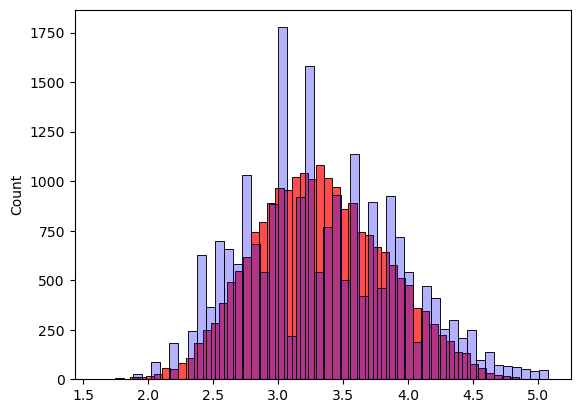

In [27]:
test_dicts = df_test[features].to_dict(orient= 'records')
X_test = dv.transform(test_dicts)
y_pred_test = ridge_model.predict(X_test)

sns.histplot(y_pred_test, color= 'red', alpha= 0.7, bins= 50)
sns.histplot(y_test, color= 'blue', alpha= 0.3, bins= 50)

In [28]:
# Obter as previsões na escala de real
y_pred_orig = np.expm1(y_pred_test) 
# Obter o valor real (target):
y_test_orig= np.expm1(y_test)

# Cálculo do MAE
mae = mean_absolute_error(y_test_orig, y_pred_orig)
print(f"MAE (Erro Absoluto Médio): ${mae:.2f}")

# Cálculo do RMSE
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
print(f"RMSE (Raiz do Erro Quadrático Médio): ${rmse:.2f}")

MAE (Erro Absoluto Médio): $8.24
RMSE (Raiz do Erro Quadrático Médio): $13.54


Testando o modelo em um Vinho qualquer

In [30]:
customer = test_dicts[-1]
X_customer = dv.transform([customer])
test_dicts[-1]

{'points': 92,
 'country': 'us',
 'province': 'california',
 'variety': 'sauvignon_blanc',
 'region_1': 'santa_ynez_valley',
 'winery': 'brander'}

Valor da predição

In [33]:
y_customer_pred = ridge_model.predict(X_customer)
np.expm1(y_customer_pred)

array([27.60665068])

Valor Real

In [37]:
np.expm1(y_test[-1])

25.000000000000004